# Compare Francesco's TCGA slides & mines

In [29]:
import openslide
from pathlib import Path
from IPython.display import Image, display, clear_output

In [3]:
data_dir = Path('/data/pathology/archives/breast/TCGA_diagnostics')

In [4]:
francesco_slides = [s for s in Path(data_dir, 'images').glob('*.tif')]
clement_slides = [s for s in Path(data_dir, 'clement_slides/tif').glob('*.tif')]
len(francesco_slides)+len(clement_slides)

1126

In [9]:
s1 = francesco_slides[0]
s2 = clement_slides[0]
s1.name, s2.name

('TCGA-GM-A2D9-01Z-00-DX1.AF4BF2DD-05FB-400B-A1BC-6E7C9B9DDF05.tif',
 'TCGA-OL-A5RZ-01Z-00-DX1.6394C05E-1C34-4F4B-8859-F5E961E7EFF9.tif')

In [12]:
s1_os = openslide.OpenSlide(str(s1))
s1_os.dimensions

(103768, 85061)

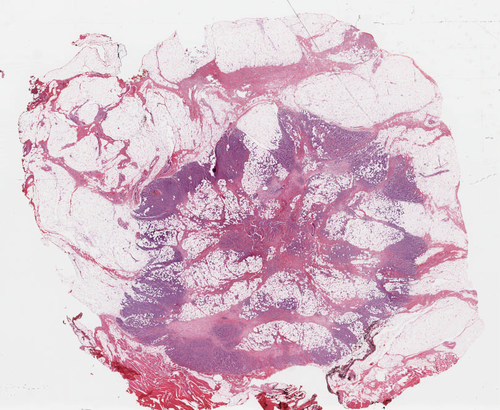

In [22]:
s1_os.get_thumbnail((500,500))

In [15]:
s1_os.level_dimensions

((103768, 85061),
 (51884, 42530),
 (25942, 21265),
 (12971, 10632),
 (6485, 5316),
 (3242, 2658),
 (1621, 1329),
 (810, 664),
 (405, 332))

In [16]:
s1_os.level_downsamples

(1.0,
 2.000011756407242,
 4.000023512814484,
 8.000235139202408,
 16.00108708642332,
 32.004641975686866,
 64.00928395137373,
 128.1062788189796,
 256.2125576379592)

In [17]:
s2_os = openslide.OpenSlide(str(s2))
s2_os.dimensions

(19799, 20915)

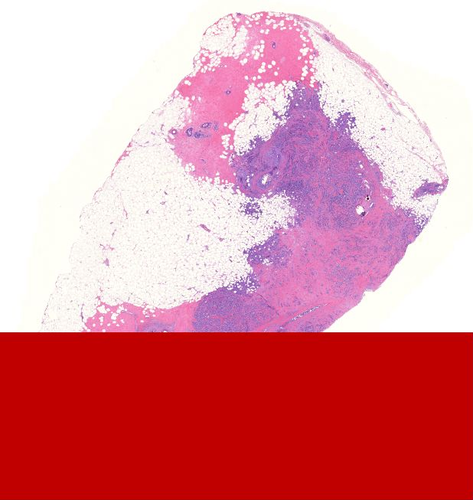

In [23]:
s2_os.get_thumbnail((500,500))

In [20]:
s2_os.level_dimensions

((19799, 20915),
 (9899, 10457),
 (4949, 5228),
 (2474, 2614),
 (1237, 1307),
 (618, 653))

In [21]:
s2_os.level_downsamples

(1.0,
 2.0000983250133997,
 4.00059000813655,
 8.001988546221174,
 16.003977092442348,
 32.03315665313688)

In [24]:
s2_os_svs = openslide.OpenSlide(str(s2).replace('tif', 'svs'))
s2_os_svs.dimensions

(19799, 20915)

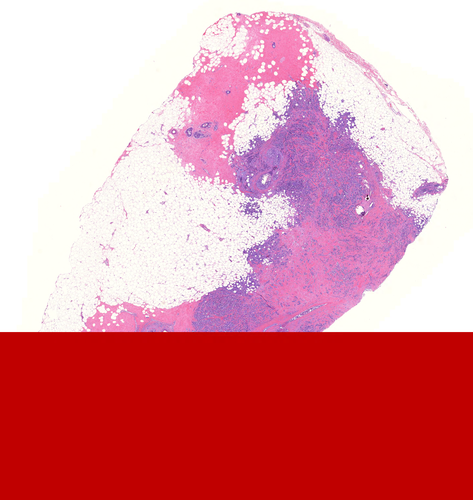

In [25]:
s2_os_svs.get_thumbnail((500,500))

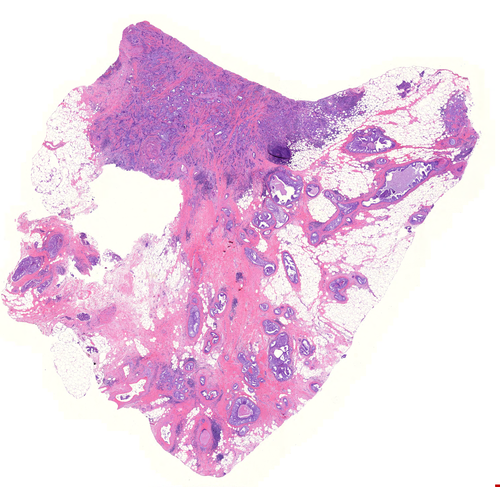

next? (y/n)  n


In [36]:
for fp in clement_slides:
    s = openslide.OpenSlide(str(fp).replace('tif', 'svs'))
    thumb = s.get_thumbnail((500,500))
    display(thumb)
    ans = input('next? (y/n) ')
    if ans == 'n':
        break
    clear_output(wait=True)
    s.close()

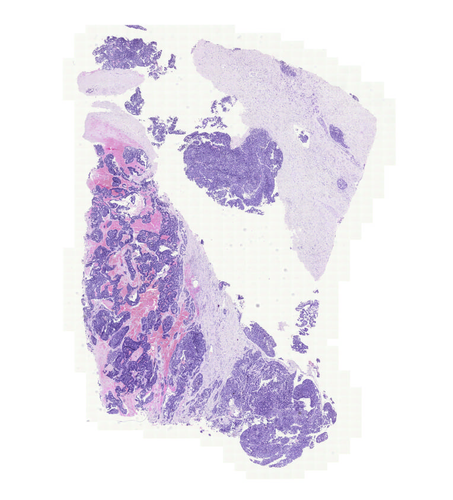

next? (y/n)  n


In [37]:
for fp in francesco_slides:
    s = openslide.OpenSlide(str(fp))
    thumb = s.get_thumbnail((500,500))
    display(thumb)
    ans = input('next? (y/n) ')
    if ans == 'n':
        break
    clear_output(wait=True)
    s.close()

### Compare the result of ASAP (JPEG compression & rate=80) with the same slides from Francesco pping

In [42]:
francesco = francesco_slides[7]
str(francesco)

'/data/pathology/archives/breast/TCGA_diagnostics/images/TCGA-A1-A0SM-01Z-00-DX1.AD503DBD-4D93-4476-B467-F091254FDF78.tif'

In [52]:
clement = Path(str(francesco).replace('images','clement_slides/tmp'))
str(clement)

'/data/pathology/archives/breast/TCGA_diagnostics/clement_slides/tmp/TCGA-A1-A0SM-01Z-00-DX1.AD503DBD-4D93-4476-B467-F091254FDF78.tif'

In [53]:
francesco_slide = openslide.OpenSlide(str(francesco))
francesco_slide.dimensions

(100794, 80501)

In [54]:
clement_slide = openslide.OpenSlide(str(clement))
clement_slide.dimensions

(100794, 80501)

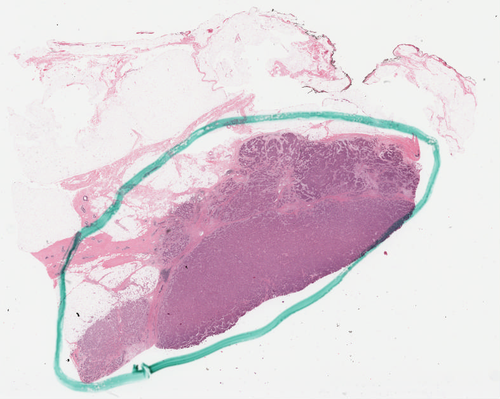

In [46]:
francesco_slide.get_thumbnail((500,500))

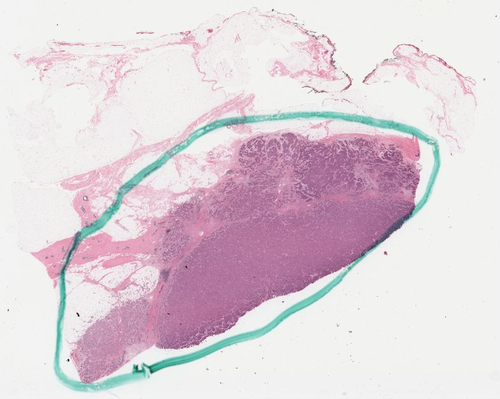

In [47]:
clement_slide.get_thumbnail((500,500))

In [48]:
francesco_slide.level_downsamples

(1.0,
 2.0000124223602485,
 4.000064530409837,
 8.000327830929466,
 16.001290695891537,
 32.00830324499494,
 64.03950633757185,
 128.1300016591264,
 256.4229469538581)

In [49]:
clement_slide.level_downsamples

(1.0,
 2.0000124223602485,
 4.000064530409837,
 8.000327830929466,
 16.001290695891537,
 32.00830324499494,
 64.03950633757185,
 128.1300016591264,
 256.4229469538581)